In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 
from sklearn.metrics import fbeta_score
import model_utils as utils
from sklearn.externals import joblib

# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

dataset, features, labels = utils.getDataSet("datasets/dataset.csv")


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PATOLOGIA_TIPO,PET_COD_DEPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM,RIESGO_VIDA
0,7.092092e-01,1.486486e-01,4.364364e-01,3.398398e-01,6.256256e-01,0.444945,7.192192e-01,5.950951e-01,4.504505e-01,9.999999e-01,...,4.879880e-01,0.277778,2.702703e-01,1.0,0.260761,9.999999e-01,0.222222,5.915916e-01,3.573574e-01,1
1,8.478478e-01,9.999999e-01,9.704705e-01,9.999999e-01,6.256256e-01,0.800801,3.798799e-01,5.950951e-01,9.999999e-01,9.999999e-01,...,4.879880e-01,0.744244,8.288288e-01,1.0,1.000000,9.999999e-01,1.000000,5.915916e-01,1.000000e-07,1
2,3.748749e-01,4.019019e-01,1.000000e-07,9.999999e-01,6.256256e-01,0.370370,9.199199e-01,5.950951e-01,4.504505e-01,9.999999e-01,...,4.879880e-01,0.524024,3.978979e-01,1.0,0.625626,9.999999e-01,1.000000,5.915916e-01,6.381381e-01,0
3,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.054054,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,...,1.000000e-07,0.277778,1.239743e-07,1.0,0.625626,1.000000e-07,1.000000,1.000000e-07,6.381381e-01,0
4,6.206206e-01,9.999999e-01,9.094094e-01,3.398398e-01,6.256256e-01,0.594094,9.199199e-01,5.950951e-01,4.504505e-01,9.999999e-01,...,4.879880e-01,0.265265,4.914915e-01,1.0,1.000000,9.999999e-01,1.000000,9.999999e-01,6.381381e-01,0


## Shuffle and Split Data

In [2]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'labels' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.15, random_state = 10, stratify=labels)

X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size = 0.1, random_state = 10, stratify=y_test)
# Show the results of the split
print "features_final set has {} samples.".format(features.shape[0])
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])
print "Validation set has {} samples.".format(X_validation.shape[0])

features_final set has 1339155 samples.
Training set has 1138281 samples.
Testing set has 180786 samples.
Validation set has 20088 samples.


In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state = 300)
clf_C = AdaBoostClassifier(random_state = 300)


# Collect results on the learners
dfResults = pd.DataFrame(columns=['learner', 'train_time', 'pred_time', 'f_test', 'f_train'])

for k, clf in enumerate([clf_A, clf_B, clf_C]):
    clf_name = clf.__class__.__name__  
    clf, dfResults = utils.train_predict(clf, 1, X_train, y_train, X_test, y_test, dfResults)


/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB trained.


/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
model_utils.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  learner = learner.fit(X_train, y_train)


RandomForestClassifier trained.
AdaBoostClassifier trained.


In [4]:
display( dfResults.sort_values(by=['f_test'], ascending = False)[['learner', 'f_test']])


,learner,f_test
1,RandomForestClassifier,0.760025
2,AdaBoostClassifier,0.703412
0,GaussianNB,0.524448


# Tuning Models

## Tuning RandomForestClassifier

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
F-score on testing data: 0.7180

Optimized Model
------
Final F-score on the testing data: 0.7956


['rfClassifier.joblib']

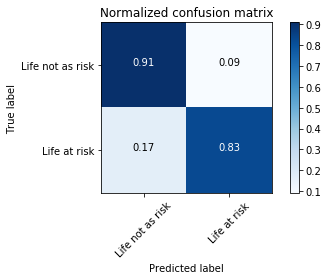

In [ ]:
from sklearn.metrics import make_scorer
rfClassifier = RandomForestClassifier(random_state = 300)

rfParameters = {    
  'criterion':['gini', 'entropy'],
  'max_depth':[5, 10],
  'max_features':['auto', 'sqrt', 'log2', None],
  'class_weight': ['balanced', 'balanced_subsample'], 
}

scorers = {
    'fb_score': make_scorer(fbeta_score, beta=2)
}

rfClassifier = utils.tuneClassifier(rfClassifier, rfParameters, X_train, X_test, y_train, y_test)

joblib.dump(rfClassifier, 'rfClassifier.joblib') 


## Tuning AdaBoostClassifier

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
adaClassifier = AdaBoostClassifier(random_state = 300)

adaParameters = {
  'learning_rate':[0.1, 0.5, 1],
  'algorithm' :['SAMME', 'SAMME.R']
  #'max_features':['auto', 'sqrt', 'log2', None],
}

adaClassifier = utils.tuneClassifier(adaClassifier, adaParameters,  X_train, X_test, y_train, y_test)

joblib.dump(rfClassifier, 'adaClassifier.joblib') 


# Stacking
## Stacking with to best classifiers

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import fbeta_score, make_scorer
#meta with Gaussian
sclf = StackingClassifier(classifiers=[rfClassifier, adaClassifier], 
                          use_features_in_secondary = True,
                          meta_classifier=RandomForestClassifier(random_state = 20))
sclf = sclf.fit(X_train, y_train)
sclf_predictions = sclf.predict(X_test)
joblib.dump(sclf, 'sclf.joblib') 
print "F-score on StackingClassifier: {:.4f}".format(fbeta_score(y_test, sclf_predictions, beta = 2))

## Stacking with all classifiers

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import fbeta_score, make_scorer
#meta with Gaussian
sclf2 = StackingClassifier(classifiers=[rfClassifier, adaClassifier, GaussianNB()], 
                          use_features_in_secondary = True,
                          meta_classifier=RandomForestClassifier(random_state = 20))
sclf2 = sclf2.fit(X_train, y_train)
sclf_predictions2 = sclf2.predict(X_test)
joblib.dump(sclf2, 'sclf2.joblib') 
print "F-score on StackingClassifier: {:.4f}".format(fbeta_score(y_test, sclf_predictions2, beta = 2))

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 'not majority')
X_oversampled_train, y_oversampled_train = ros.fit_sample(X_train, y_train)

clfRFC = RandomForestClassifier(random_state = 300)
clfRFC = rfClassifier.fit(X_oversampled_train, y_oversampled_train)
clfRFC_predictions = clfRFC.predict(X_test)

joblib.dump(clfRFC, 'clfRFC.joblib') 
f_test =  fbeta_score(y_test, clfRFC_predictions, beta = 2)
print("F-score on RandomOverSampler: {:.4f}".format(fbeta_score(y_test, clfRFC_predictions, beta = 2))

In [ ]:
'''
from hpsklearn import HyperoptEstimator, random_forest

estim = HyperoptEstimator( classifier=random_forest('myRFC') )
estim.fit( X_train.values, y_train.values )

predictions_hyper_test = estim.predict(X_test)
f_hyper_test =  recall_score(y_test, predictions_hyper_test)
print("HyperoptEstimator score: %f"%(f_hyper_test))
'''